<a href="https://colab.research.google.com/github/lakshrav/Detection-of-Phishing-URLs/blob/main/BDA_Project_Detection_of_Phishing_URLs_and_testing_on_live_URLs_crawled_from_PhishTank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Big Data Analytics Project - Detection of Phishing URLs and testing on live URLs crawled from PhishTank

- Lakshana - 2020103537<br>
- Rithvik Senthil - 2020103039<br>

In [ ]:
# loading the dataset

from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
!pip install requests
!pip install tldextract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 11.5 MB/s eta 0:00:00


In [ ]:
!pip install selenium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 82.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.9/384.9 kB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd #pandas library
from urllib.parse import urlparse,urlencode #url parsing
import ipaddress # ??
import re # ??
from sklearn.utils import shuffle
import re
from bs4 import BeautifulSoup as bs
#import whois
import urllib
import requests
from bs4 import BeautifulSoup
from time import sleep
from random import randint
from selenium import webdriver
import numpy as np
import urllib.request
from datetime import datetime
import urllib.request as urllib2

import tldextract

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

import re
from bs4 import BeautifulSoup
import urllib
import urllib.request
from datetime import datetime
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

In [ ]:
phishing = pd.read_csv("/content/gdrive/MyDrive/BDA project/Dataset/phishing_dataset.csv") #read csv file and store in dataframe
column_names = ["URL"]
phishing.columns = column_names #adding column title
phishing['label'] = 1 #label is an inbuilt column - fix all phishing labels as 1
phishing.head(5) #display first 5

,URL,label
0,http://bid.openx.net/json?amp;amp;amp;amp;cid;...,1
1,http://webmail2.centurytel.net/hwebmail/servic...,1
2,http://www.google.com.ng/imgres?imgurl=http://...,1
3,http://webmail2.centurytel.net/hwebmail/servic...,1
4,http://www.liceonuzzi.it/cmd=_Inf/connectionSt...,1


In [ ]:
phishing2 = pd.read_csv("/content/gdrive/MyDrive/BDA project/Dataset/malicious_phish.csv") #read csv file and store in dataframe
column_names2 = ["url"]
phishing2.head(5) #display first 5

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [ ]:
phishing2.shape

(651191, 2)

In [ ]:
phishing.shape

(9964, 2)

In [ ]:
group=phishing2.groupby("type")
benign2=group.get_group("benign")
phishing2=group.get_group("phishing")

In [ ]:
benign2.head(5)

,url,type
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign


In [ ]:
phishing2.head(5)

,url,type,label
0,br-icloud.com.br,phishing,1
21,signin.eby.de.zukruygxctzmmqi.civpro.co.za,phishing,1
28,http://www.marketingbyinternet.com/mo/e56508df...,phishing,1
40,https://docs.google.com/spreadsheet/viewform?f...,phishing,1
72,retajconsultancy.com,phishing,1


In [ ]:

benign2 = benign2.drop(columns= ["type"],inplace= True)
phishing2 = phishing2.drop(columns= ["type"], inplace = True)

benign2 = benign2.assign(label= np.array(0))

KeyError: ignored

In [ ]:
benign2.head(5)

,url,label
1,mp3raid.com/music/krizz_kaliko.html,0
2,bopsecrets.org/rexroth/cr/1.htm,0
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,0
6,espn.go.com/nba/player/_/id/3457/brandon-rush,0
7,yourbittorrent.com/?q=anthony-hamilton-soulife,0


In [ ]:
#doing the same for benign dataset as well

benign = pd.read_csv("/content/gdrive/MyDrive/BDA project/Dataset/Benign_list_big_final.csv")
column_names = ["URL"]
benign.columns = column_names
benign['label'] = 0
legiurl = benign.sample(n = 9000, random_state = 0).copy()
benign_testing= benign.drop(legiurl.index)
legiurl = legiurl.reset_index(drop=True)

In [ ]:
benign.shape

(35377, 2)

In [ ]:
legiurl.head(100)

,URL,label
0,http://lenovo.com/ISS_Static/WW/site/scripts/f...,0
1,http://putlocker.is/watch-turn-washingtons-spi...,0
2,http://venturebeat.com/2014/12/11/prezi-now-le...,0
3,http://interpark.com/product/MallDisplay.do?_m...,0
4,http://jezebel.com/rand-pauls-loser-son-pleads...,0
...,...,...
95,http://tobogo.net/cdsb/board.php?board=humor&b...,0
96,http://sourceforge.net/directory/communication...,0
97,http://patch.com/florida/tarponsprings/slain-t...,0
98,http://mashable.com/category/amtrak/2015/05/12...,0


In [ ]:
benign_testing.shape

(26377, 2)

In [ ]:
legiurl.shape

(9000, 2)

In [ ]:
benign_testing.head(100)

,URL,label
0,http://1337x.to/torrent/1110018/Blackhat-2015-...,0
1,http://1337x.to/torrent/1122940/Blackhat-2015-...,0
2,http://1337x.to/torrent/1124395/Fast-and-Furio...,0
3,http://1337x.to/torrent/1145504/Avengers-Age-o...,0
5,http://1337x.to/torrent/294349/American-Idol-S...,0
...,...,...
120,http://couchtuner.eu.com/2014/07/sullivan-and-...,0
121,http://couchtuner.eu.com/2014/07/switched-at-b...,0
123,http://cox.com/residential/tv/contour.cox?camp...,0
125,http://dantri.com.vn/event-2668/85-nam-thanh-l...,0


In [ ]:
phishurl = phishing.sample(n = 9000, random_state = 0).copy()
phishurl = phishurl.reset_index(drop=True)
phishurl.head()

,URL,label
0,http://battle-en.llwow.asia/login/en/login.html,1
1,http://linjinming.hk03.world-dns.com/login.asp,1
2,http://akfjsh.com/images/?us.battle.net/login/...,1
3,http://online.citicard.com.q0wbmxqy0m.agencja-...,1
4,http://us.battle.net.ok.qe-rs.com/login/en/log...,1


In [ ]:
frames = [phishurl, legiurl]
result = pd.concat(frames) #concatenating both benign and phishing
display(result)

,URL,label
0,http://battle-en.llwow.asia/login/en/login.html,1
1,http://linjinming.hk03.world-dns.com/login.asp,1
2,http://akfjsh.com/images/?us.battle.net/login/...,1
3,http://online.citicard.com.q0wbmxqy0m.agencja-...,1
4,http://us.battle.net.ok.qe-rs.com/login/en/log...,1
...,...,...
8995,http://kenh14.vn/2-tek/can-canh-yotaphone-chie...,0
8996,http://babal.net/women/view/1958/%D8%A7%D8%B3%...,0
8997,http://olx.pl/i2/nieruchomosci/biura-lokale/za...,0
8998,http://emgn.com/entertainment/16-cleaning-hack...,0


In [ ]:
result = shuffle(result) #shuffle the entries
result.reset_index(inplace=True, drop=True) #do not shuffle index
result.head(100)

,URL,label
0,http://huaphone.net/js/?us.battle.net/login/en...,1
1,http://amig0slivechats5.blogspot.com/,1
2,http://lost-monkey-habbo.blogspot.com/,1
3,http://web.de/magazine/wirtschaft/griechenland...,0
4,http://www.geraweb.net/moedasgraaaatis/,1
...,...,...
95,http://buzzfil.net/article/5343/c-mignon/la-st...,0
96,http://bestblackhatforum.com/Thread-GET-Genesi...,0
97,http://www.andyosuna.com/school/resources/Appl...,1
98,http://www.clintoncroswell.com/flexxbuffchest....,1


In [ ]:
result.shape

#9000 phishing and 9000 benign

(18000, 2)

In [ ]:
result.to_csv("/content/gdrive/MyDrive/BDA project/Dataset/final_dataset.csv", index=False) #save in final dataset csv file

#RUN THIS TO OBTAIN PROCESSED FINAL CSV FILE

In [ ]:
result=pd.read_csv("/content/gdrive/MyDrive/BDA project/Dataset/final_dataset.csv")
result.head(50)

,URL,label
0,http://sberbank.ru/moscow/ru/person/investment...,0
1,http://otomoto.pl/oferta/trailor-tarcze-os-mer...,0
2,http://nguyentandung.org/truc-tiep-dhcd-vinamo...,0
3,http://putlocker.is/watch-the-amazing-spider-m...,0
4,http://correios.com.br/espanol/el-correo-brasi...,0
5,http://appleid.apple.co.uk.cgi-bin.webobjects....,1
6,http://appleid.apple.co.uk.cgi-bin.webobjects....,1
7,http://www.tecdiary.org/i/paypol-renew.com.log...,1
8,http://kenh14.vn/2-tek/bat-mi-chieu-thuc-luyen...,0
9,http://kenh14.vn/star/tu-tuoi-tho-co-cuc-den-c...,0


In [ ]:
pos=0
neg=0
for i in range(0,18000):
  if(result.loc[i,"label"]==0):
    neg+=1
  else:
    pos+=1
print(f"Total: {len(result)}")
print(f"Legitimate URLs are {neg}")
print(f"Phishing URLs are {pos}")

Total: 18000
Legitimate URLs are 9000
Phishing URLs are 9000


#Feature Extraction

In [ ]:
# I. Feature extraction

#1. Getting domain
def getDomain(url):
  domain = urlparse(url).netloc #gets the domain name
  if re.match(r"^www.",domain): #must remove www -> http://www.brkotomotiv.com
    domain = domain.replace("www.","")
  return domain


#2. Has IP address

def havingIP(url):
  try:
    ipaddress.ip_address(url)
    ip = 1
  except:
    ip = 0
  return ip


#3. @ symbol
def haveAtSign(url):
  if "@" in url:
    at = 1
  else:
    at = 0
  return at


#4. Length of URL - fixing it at 54

def lengthOfUrl(url):
  return len(url)

#5. Depth of URL based on number of /
def getDepth(url):
  s = urlparse(url).path.split('/')
  depth = 0
  for j in range(len(s)):
    if len(s[j]) != 0:
      depth = depth+1
  return depth

# 6.Checking for redirection '//' in the url (Redirection)
def redirection(url):
  pos = url.rfind('//')
  if pos > 6:             #Redirection // exists in greater than 6th position most of the time
    if pos > 7:
      return 1
    else:
      return 0
  else:
    return 0

# 7.Existence of “HTTPS” Token in the Domain name Part of the URL (https_Domain)
def httpDomain(url):
  domain = urlparse(url).netloc #urlparse parses the url to extract domain name
  if 'https' in domain:            #Does "https" exist in domain name
    return 1
  else:
    return 0

#list of all the shortening services
shortening_services = r"bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|" \
                      r"yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|" \
                      r"short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|" \
                      r"doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|db\.tt|" \
                      r"qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|q\.gs|is\.gd|" \
                      r"po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|x\.co|" \
                      r"prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|" \
                      r"tr\.im|link\.zip\.net"

# 8. Checking for Shortening Services in URL (Tiny_URL)
def tinyURL(url):
    match=re.search(shortening_services,url)
    if match:
        return 1
    else:
        return 0

# 9.Checking for Prefix or Suffix Separated by (-) in the Domain (Prefix/Suffix)
def prefixSuffix(url):
    if '-' in urlparse(url).netloc:   #Basically just have to check if '-' exists in the domain name
        return 1            # phishing
    else:
        return 0            # legitimate

def web_traffic(url):
  try:
    #Filling the whitespaces in the URL if any
    url = urllib.parse.quote(url)
    rank = BeautifulSoup(urllib.request.urlopen("http://data.alexa.com/data?cli=10&dat=s&url=" + url).read(), "xml").find(
        "REACH")['RANK']
    rank = int(rank)
  except TypeError:
        return 1
  if rank <100000:
    return 1
  else:
    return 0



#II. HTML/JS based Features

#10. IFrame is used to display an additional web page into the one that is currently shown. Phsihers may use IFrames with invisible borders to present an invisible or mailicious IFrame
# def iframe(response):
#   if response == "":
#       return 1
#   else:
#       if re.findall(r"[<iframe>|<frameBorder>]", response.text):
#           return 0
#       else:
#           return 1

#11. Phishers may use mouseover to show a fake url to users in the status bar. To detect this, we must dig out the "on mouseover" event
# def mouseOver(response):
#   if response == "" :
#     return 1
#   else:
#     if re.findall("<script>.+onmouseover.+</script>", response.text):
#       return 1
#     else:
#       return 0

# #12. Phishers may disable right click functionality as that may prevent users from viewing the source code
# def rightClick(response):
#   if response == "":
#     return 1
#   else:
#     if re.findall(r"event.button ?== ?2", response.text):
#       return 0
#     else:
#       return 1

# #13. Websites that have been forwarded many times are most likely phishing websites. If number of forwardings is less than 2 it is legitimate else phishing
# def forwarding(response):
#   if response == "":
#     return 1
#   else:
#     if len(response.history) <= 2:
#       return 0
#     else:
#       return 1

# 14. Length of Hostname
def lengthOfHostName(url):
  parsed_uri = urlparse(url)
  result = '{uri.scheme}://{uri.netloc}/'.format(uri=parsed_uri)
  return len(result)

# 15. Has Subdomain or not
def hasSubDomain(url):
  result = tldextract.extract(url)
  if (len(result.subdomain)) > 0:
    return 1
  return 0


In [ ]:
def featureExtraction(url, label) :
  features = []

  # features.append(getDomain(url))
  features.append(havingIP(url))
  features.append(haveAtSign(url))
  features.append(lengthOfUrl(url))
  features.append(getDepth(url))
  features.append(lengthOfHostName(url))
  features.append(hasSubDomain(url))
  features.append(redirection(url))

  features.append(httpDomain(url))
  features.append(tinyURL(url))
  features.append(prefixSuffix(url))


  #dns = 0
  # try:
  #   domain_name = whois.whois(urlparse(url).netloc)
  # except:
  #   dns = 1

  # features.append(dns)

  # try:
  #   response = requests.get(url,headers={"User-Agent": "Mozilla/5.0 (X11; CrOS x86_64 12871.102.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.141 Safari/537.36"})

  # except:
  #   response = ""

  # features.append(iframe(response))
  # features.append(mouseOver(response))
  # features.append(rightClick(response))
  # features.append(forwarding(response))

  #finally
  features.append(label)
  return features

In [ ]:
final = []

for i in range(0, 18000):
  url = result["URL"][i]
  label = result['label'][i]
  final.append(featureExtraction(url, label))

In [ ]:
len(final)

18000

In [ ]:
import ipaddress
import re
import urllib.request
from bs4 import BeautifulSoup
import socket
import requests
from googlesearch import search
import whois
from datetime import date, datetime
import time
from dateutil.parser import parse as date_parse
from urllib.parse import urlparse

class FeatureExtraction:
    features = []
    def __init__(self,url):
        self.features = []
        self.url = url
        self.domain = ""
        self.whois_response = ""
        self.urlparse = ""
        self.response = ""
        self.soup = ""

        try:
            self.response = requests.get(url)
            self.soup = BeautifulSoup(response.text, 'html.parser')
        except:
            pass

        try:
            self.urlparse = urlparse(url)
            self.domain = self.urlparse.netloc
        except:
            pass

        try:
            self.whois_response = whois.whois(self.domain)
        except:
            pass




        self.features.append(self.UsingIp())
        self.features.append(self.longUrl())
        self.features.append(self.shortUrl())
        self.features.append(self.symbol())
        self.features.append(self.redirecting())
        self.features.append(self.prefixSuffix())
        self.features.append(self.SubDomains())
        self.features.append(self.Hppts())
        self.features.append(self.DomainRegLen())
        self.features.append(self.Favicon())


        self.features.append(self.NonStdPort())
        self.features.append(self.HTTPSDomainURL())
        self.features.append(self.RequestURL())
        self.features.append(self.AnchorURL())
        self.features.append(self.LinksInScriptTags())
        self.features.append(self.ServerFormHandler())
        self.features.append(self.InfoEmail())
        self.features.append(self.AbnormalURL())
        self.features.append(self.WebsiteForwarding())
        self.features.append(self.StatusBarCust())

        self.features.append(self.DisableRightClick())
        self.features.append(self.UsingPopupWindow())
        self.features.append(self.IframeRedirection())
        self.features.append(self.AgeofDomain())
        self.features.append(self.DNSRecording())
        self.features.append(self.WebsiteTraffic())
        self.features.append(self.PageRank())
        self.features.append(self.GoogleIndex())
        self.features.append(self.LinksPointingToPage())
        self.features.append(self.StatsReport())


     # 1.UsingIp
    def UsingIp(self):
        try:
            ipaddress.ip_address(self.url)
            return -1
        except:
            return 1

    # 2.longUrl
    def longUrl(self):
        if len(self.url) < 54:
            return 1
        if len(self.url) >= 54 and len(self.url) <= 75:
            return 0
        return -1

    # 3.shortUrl
    def shortUrl(self):
        match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                    'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                    'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                    'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                    'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                    'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                    'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|tr\.im|link\.zip\.net', self.url)
        if match:
            return -1
        return 1

    # 4.Symbol@
    def symbol(self):
        if re.findall("@",self.url):
            return -1
        return 1

    # 5.Redirecting//
    def redirecting(self):
        if self.url.rfind('//')>6:
            return -1
        return 1

    # 6.prefixSuffix
    def prefixSuffix(self):
        try:
            match = re.findall('\-', self.domain)
            if match:
                return -1
            return 1
        except:
            return -1

    # 7.SubDomains
    def SubDomains(self):
        dot_count = len(re.findall("\.", self.url))
        if dot_count == 1:
            return 1
        elif dot_count == 2:
            return 0
        return -1

    # 8.HTTPS
    def Hppts(self):
        try:
            https = self.urlparse.scheme
            if 'https' in https:
                return 1
            return -1
        except:
            return 1

    # 9.DomainRegLen
    def DomainRegLen(self):
        try:
            expiration_date = self.whois_response.expiration_date
            creation_date = self.whois_response.creation_date
            try:
                if(len(expiration_date)):
                    expiration_date = expiration_date[0]
            except:
                pass
            try:
                if(len(creation_date)):
                    creation_date = creation_date[0]
            except:
                pass

            age = (expiration_date.year-creation_date.year)*12+ (expiration_date.month-creation_date.month)
            if age >=12:
                return 1
            return -1
        except:
            return -1

    # 10. Favicon
    def Favicon(self):
        try:
            for head in self.soup.find_all('head'):
                for head.link in self.soup.find_all('link', href=True):
                    dots = [x.start(0) for x in re.finditer('\.', head.link['href'])]
                    if self.url in head.link['href'] or len(dots) == 1 or domain in head.link['href']:
                        return 1
            return -1
        except:
            return -1

    # 11. NonStdPort
    def NonStdPort(self):
        try:
            port = self.domain.split(":")
            if len(port)>1:
                return -1
            return 1
        except:
            return -1

    # 12. HTTPSDomainURL
    def HTTPSDomainURL(self):
        try:
            if 'https' in self.domain:
                return -1
            return 1
        except:
            return -1

    # 13. RequestURL
    def RequestURL(self):
        try:
            for img in self.soup.find_all('img', src=True):
                dots = [x.start(0) for x in re.finditer('\.', img['src'])]
                if self.url in img['src'] or self.domain in img['src'] or len(dots) == 1:
                    success = success + 1
                i = i+1

            for audio in self.soup.find_all('audio', src=True):
                dots = [x.start(0) for x in re.finditer('\.', audio['src'])]
                if self.url in audio['src'] or self.domain in audio['src'] or len(dots) == 1:
                    success = success + 1
                i = i+1

            for embed in self.soup.find_all('embed', src=True):
                dots = [x.start(0) for x in re.finditer('\.', embed['src'])]
                if self.url in embed['src'] or self.domain in embed['src'] or len(dots) == 1:
                    success = success + 1
                i = i+1

            for iframe in self.soup.find_all('iframe', src=True):
                dots = [x.start(0) for x in re.finditer('\.', iframe['src'])]
                if self.url in iframe['src'] or self.domain in iframe['src'] or len(dots) == 1:
                    success = success + 1
                i = i+1

            try:
                percentage = success/float(i) * 100
                if percentage < 22.0:
                    return 1
                elif((percentage >= 22.0) and (percentage < 61.0)):
                    return 0
                else:
                    return -1
            except:
                return 0
        except:
            return -1

    # 14. AnchorURL
    def AnchorURL(self):
        try:
            i,unsafe = 0,0
            for a in self.soup.find_all('a', href=True):
                if "#" in a['href'] or "javascript" in a['href'].lower() or "mailto" in a['href'].lower() or not (url in a['href'] or self.domain in a['href']):
                    unsafe = unsafe + 1
                i = i + 1

            try:
                percentage = unsafe / float(i) * 100
                if percentage < 31.0:
                    return 1
                elif ((percentage >= 31.0) and (percentage < 67.0)):
                    return 0
                else:
                    return -1
            except:
                return -1

        except:
            return -1

    # 15. LinksInScriptTags
    def LinksInScriptTags(self):
        try:
            i,success = 0,0

            for link in self.soup.find_all('link', href=True):
                dots = [x.start(0) for x in re.finditer('\.', link['href'])]
                if self.url in link['href'] or self.domain in link['href'] or len(dots) == 1:
                    success = success + 1
                i = i+1

            for script in self.soup.find_all('script', src=True):
                dots = [x.start(0) for x in re.finditer('\.', script['src'])]
                if self.url in script['src'] or self.domain in script['src'] or len(dots) == 1:
                    success = success + 1
                i = i+1

            try:
                percentage = success / float(i) * 100
                if percentage < 17.0:
                    return 1
                elif((percentage >= 17.0) and (percentage < 81.0)):
                    return 0
                else:
                    return -1
            except:
                return 0
        except:
            return -1

    # 16. ServerFormHandler
    def ServerFormHandler(self):
        try:
            if len(self.soup.find_all('form', action=True))==0:
                return 1
            else :
                for form in self.soup.find_all('form', action=True):
                    if form['action'] == "" or form['action'] == "about:blank":
                        return -1
                    elif self.url not in form['action'] and self.domain not in form['action']:
                        return 0
                    else:
                        return 1
        except:
            return -1

    # 17. InfoEmail
    def InfoEmail(self):
        try:
            if re.findall(r"[mail\(\)|mailto:?]", self.soap):
                return -1
            else:
                return 1
        except:
            return -1

    # 18. AbnormalURL
    def AbnormalURL(self):
        try:
            if self.response.text == self.whois_response:
                return 1
            else:
                return -1
        except:
            return -1

    # 19. WebsiteForwarding
    def WebsiteForwarding(self):
        try:
            if len(self.response.history) <= 1:
                return 1
            elif len(self.response.history) <= 4:
                return 0
            else:
                return -1
        except:
             return -1

    # 20. StatusBarCust
    def StatusBarCust(self):
        try:
            if re.findall("<script>.+onmouseover.+</script>", self.response.text):
                return 1
            else:
                return -1
        except:
             return -1

    # 21. DisableRightClick
    def DisableRightClick(self):
        try:
            if re.findall(r"event.button ?== ?2", self.response.text):
                return 1
            else:
                return -1
        except:
             return -1

    # 22. UsingPopupWindow
    def UsingPopupWindow(self):
        try:
            if re.findall(r"alert\(", self.response.text):
                return 1
            else:
                return -1
        except:
             return -1

    # 23. IframeRedirection
    def IframeRedirection(self):
        try:
            if re.findall(r"[<iframe>|<frameBorder>]", self.response.text):
                return 1
            else:
                return -1
        except:
             return -1

    # 24. AgeofDomain
    def AgeofDomain(self):
        try:
            creation_date = self.whois_response.creation_date
            try:
                if(len(creation_date)):
                    creation_date = creation_date[0]
            except:
                pass

            today  = date.today()
            age = (today.year-creation_date.year)*12+(today.month-creation_date.month)
            if age >=6:
                return 1
            return -1
        except:
            return -1

    # 25. DNSRecording
    def DNSRecording(self):
        try:
            creation_date = self.whois_response.creation_date
            try:
                if(len(creation_date)):
                    creation_date = creation_date[0]
            except:
                pass

            today  = date.today()
            age = (today.year-creation_date.year)*12+(today.month-creation_date.month)
            if age >=6:
                return 1
            return -1
        except:
            return -1

    # 26. WebsiteTraffic
    def WebsiteTraffic(self):
        try:
            rank = BeautifulSoup(urllib.request.urlopen("http://data.alexa.com/data?cli=10&dat=s&url=" + url).read(), "xml").find("REACH")['RANK']
            if (int(rank) < 100000):
                return 1
            return 0
        except :
            return -1

    # 27. PageRank
    def PageRank(self):
        try:
            prank_checker_response = requests.post("https://www.checkpagerank.net/index.php", {"name": self.domain})

            global_rank = int(re.findall(r"Global Rank: ([0-9]+)", rank_checker_response.text)[0])
            if global_rank > 0 and global_rank < 100000:
                return 1
            return -1
        except:
            return -1


    # 28. GoogleIndex
    def GoogleIndex(self):
        try:
            site = search(self.url, 5)
            if site:
                return 1
            else:
                return -1
        except:
            return 1

    # 29. LinksPointingToPage
    def LinksPointingToPage(self):
        try:
            number_of_links = len(re.findall(r"<a href=", self.response.text))
            if number_of_links == 0:
                return 1
            elif number_of_links <= 2:
                return 0
            else:
                return -1
        except:
            return -1

    # 30. StatsReport
    def StatsReport(self):
        try:
            url_match = re.search(
        'at\.ua|usa\.cc|baltazarpresentes\.com\.br|pe\.hu|esy\.es|hol\.es|sweddy\.com|myjino\.ru|96\.lt|ow\.ly', url)
            ip_address = socket.gethostbyname(self.domain)
            ip_match = re.search('146\.112\.61\.108|213\.174\.157\.151|121\.50\.168\.88|192\.185\.217\.116|78\.46\.211\.158|181\.174\.165\.13|46\.242\.145\.103|121\.50\.168\.40|83\.125\.22\.219|46\.242\.145\.98|'
                                '107\.151\.148\.44|107\.151\.148\.107|64\.70\.19\.203|199\.184\.144\.27|107\.151\.148\.108|107\.151\.148\.109|119\.28\.52\.61|54\.83\.43\.69|52\.69\.166\.231|216\.58\.192\.225|'
                                '118\.184\.25\.86|67\.208\.74\.71|23\.253\.126\.58|104\.239\.157\.210|175\.126\.123\.219|141\.8\.224\.221|10\.10\.10\.10|43\.229\.108\.32|103\.232\.215\.140|69\.172\.201\.153|'
                                '216\.218\.185\.162|54\.225\.104\.146|103\.243\.24\.98|199\.59\.243\.120|31\.170\.160\.61|213\.19\.128\.77|62\.113\.226\.131|208\.100\.26\.234|195\.16\.127\.102|195\.16\.127\.157|'
                                '34\.196\.13\.28|103\.224\.212\.222|172\.217\.4\.225|54\.72\.9\.51|192\.64\.147\.141|198\.200\.56\.183|23\.253\.164\.103|52\.48\.191\.26|52\.214\.197\.72|87\.98\.255\.18|209\.99\.17\.27|'
                                '216\.38\.62\.18|104\.130\.124\.96|47\.89\.58\.141|78\.46\.211\.158|54\.86\.225\.156|54\.82\.156\.19|37\.157\.192\.102|204\.11\.56\.48|110\.34\.231\.42', ip_address)
            if url_match:
                return -1
            elif ip_match:
                return -1
            return 1
        except:
            return 1

    def getFeaturesList(self):
        return self.features

In [ ]:
final2 = []

for i in range(0, 188000):
  url = result["url"][i]
  label = result['label'][i]
  tmp = FeatureExtraction(url)
  final2.append(tmp.getFeaturesList())

Error trying to connect to socket: closing socket - timed out


In [ ]:
feature_names = [ 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth','Length of Hostname', 'Has Subdomain', 'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix','Label']
extracted = pd.DataFrame(final, columns = feature_names)
extracted.head(18000)

,Have_IP,Have_At,URL_Length,URL_Depth,Length of Hostname,Has Subdomain,Redirection,https_Domain,TinyURL,Prefix/Suffix,Label
0,0,0,91,7,19,0,0,0,0,0,0
1,0,0,100,2,18,0,0,0,0,0,0
2,0,0,102,1,25,0,0,0,0,0,0
3,0,0,84,1,20,0,0,0,0,0,0
4,0,0,100,4,23,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
17995,0,0,166,1,25,0,0,0,0,0,0
17996,0,0,96,1,63,1,0,0,0,1,1
17997,0,0,126,3,18,0,0,0,0,0,0
17998,0,0,38,2,21,0,0,0,0,0,1


In [ ]:
X=extracted[['Have_IP', 'Have_At', 'URL_Length', 'URL_Depth','Length of Hostname', 'Has Subdomain', 'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix']].to_numpy()
y=extracted['Label'].to_numpy()

In [ ]:
X.shape

(18000, 10)

In [ ]:
y.shape

(18000,)

#Random Forest

In [ ]:
# Random Forest Classifier
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=104,test_size=0.25,shuffle=True)

random_forest = RandomForestClassifier(max_depth=2, random_state=0)
random_forest.fit(X_train, y_train)

k_fold = KFold(n_splits = 5, random_state = None)
score = cross_val_score(random_forest, X_train, y_train, cv = k_fold)
mean_acc_score=sum(score)/len(score)
print(f"Cross Validation Accuracy is {mean_acc_score}\n")

y_pred = random_forest.predict(X_test)
print(classification_report(y_test, y_pred))

Cross Validation Accuracy is 0.963037037037037

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2278
           1       0.98      0.94      0.96      2222

    accuracy                           0.96      4500
   macro avg       0.97      0.96      0.96      4500
weighted avg       0.97      0.96      0.96      4500



In [ ]:
from sklearn.inspection import permutation_importance
r = permutation_importance(random_forest, X_test, y_test,
                           n_repeats=30,
                           random_state=0)

for i in r.importances_mean.argsort()[::-1]:
     if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
         print(f"{extracted.columns[i]:<8}"
               f"{r.importances_mean[i]:.3f}"
                              f" +/- {r.importances_std[i]:.3f}")

Has Subdomain0.230 +/- 0.004
URL_Length0.213 +/- 0.004
Prefix/Suffix0.004 +/- 0.001


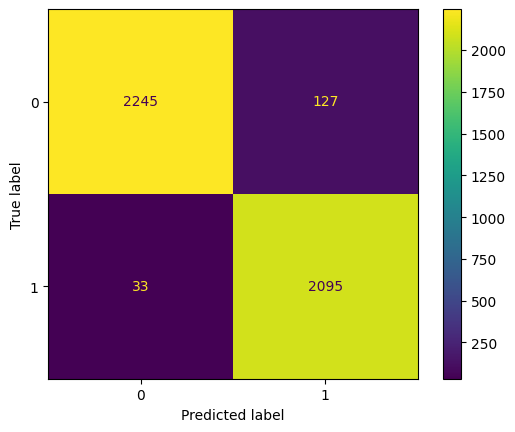

In [ ]:
cm=metrics.confusion_matrix(y_pred,y_test)
ax=ConfusionMatrixDisplay(confusion_matrix=cm)
ax.plot()
plt.show()

#Logistic Regression

In [ ]:
# Logistic Regression

logistic_regression = LogisticRegression(max_iter=10000)
logistic_regression.fit(X_train, y_train)

k_fold = KFold(n_splits = 5, random_state = None)
score = cross_val_score(logistic_regression, X_train, y_train, cv = k_fold)
mean_acc_score=sum(score)/len(score)
print(f"Cross Validation Accuracy is {mean_acc_score}\n")

y_pred = logistic_regression.predict(X_test)
print(classification_report(y_test, y_pred))

Cross Validation Accuracy is 0.8741481481481482

              precision    recall  f1-score   support

           0       0.82      0.96      0.89      2278
           1       0.95      0.79      0.86      2222

    accuracy                           0.88      4500
   macro avg       0.89      0.87      0.87      4500
weighted avg       0.89      0.88      0.87      4500



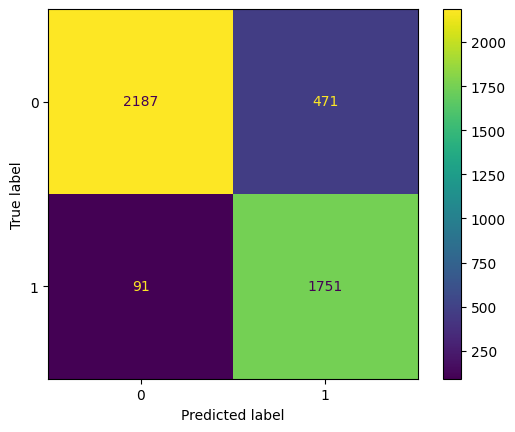

In [ ]:
cm=metrics.confusion_matrix(y_pred,y_test)
ax=ConfusionMatrixDisplay(confusion_matrix=cm)
ax.plot()
plt.show()

#Naive Bayes

In [ ]:
# Naive Bayes

naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

k_fold = KFold(n_splits = 5, random_state = None)
score = cross_val_score(naive_bayes, X_train, y_train, cv = k_fold)
mean_acc_score=sum(score)/len(score)
print(f"Cross Validation Accuracy is {mean_acc_score}\n")

y_pred = naive_bayes.predict(X_test)
print(classification_report(y_test, y_pred))

Cross Validation Accuracy is 0.867037037037037

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      2278
           1       0.96      0.76      0.85      2222

    accuracy                           0.87      4500
   macro avg       0.88      0.87      0.86      4500
weighted avg       0.88      0.87      0.86      4500



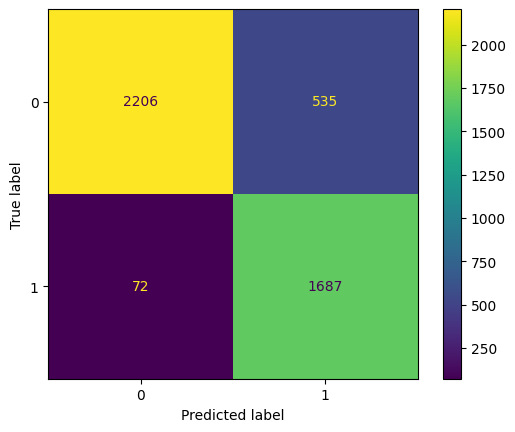

In [ ]:
cm=metrics.confusion_matrix(y_pred,y_test)
ax=ConfusionMatrixDisplay(confusion_matrix=cm)
ax.plot()
plt.show()

#Neural Networks

In [ ]:
#Neural Network
neural_network=MLPClassifier(hidden_layer_sizes=[100,50,10])
neural_network.fit(X_train,y_train)

k_fold = KFold(n_splits = 5, random_state = None)
score = cross_val_score(neural_network, X_train, y_train, cv = k_fold)
mean_acc_score=sum(score)/len(score)
print(f"Cross Validation Accuracy is {mean_acc_score}\n")

y_pred = neural_network.predict(X_test)
print(classification_report(y_test, y_pred))

Cross Validation Accuracy is 0.9639259259259259

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      2278
           1       0.98      0.94      0.96      2222

    accuracy                           0.96      4500
   macro avg       0.96      0.96      0.96      4500
weighted avg       0.96      0.96      0.96      4500



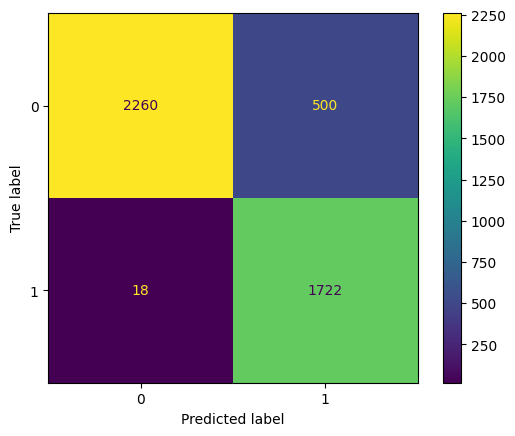

In [ ]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_pred,y_test)
ax=ConfusionMatrixDisplay(confusion_matrix=cm)
ax.plot()
plt.show()

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print(classification_report(y_pred, y_test))


              precision    recall  f1-score   support

           0       0.94      0.91      0.93      2353
           1       0.91      0.94      0.92      2147

    accuracy                           0.93      4500
   macro avg       0.93      0.93      0.93      4500
weighted avg       0.93      0.93      0.93      4500



#Web Crawling - Phishing URLs

In [ ]:
#WEB CRAWLING

pages=np.arange(1,13,1)
rows = []

for page in pages:

    phish_url="https://phishtank.org/phish_search.php?page="+ str(page)+"&valid=y&Search=Search"


    phish_req = requests.get(phish_url)
    phish_soup = bs(phish_req.text, 'html.parser')


    phish_table = phish_soup.find('table', {'class': 'data'})

    for tr in phish_table.findAll('tr')[1:]:
        rows.append([td.get_text(strip=True) for td in tr.findAll('td')])

phish_data=[]
import string
for item in rows:
  link=item[1]
  index = link.find("added")
  phish_data.append(link[:index])

phish_test = pd.DataFrame(phish_data)
column_names = ["URL"]
phish_test.columns = column_names
phish_test['Label']=1
phish_test.head(5)

,URL,Label
0,https://hnnficoplus.webcindario.com/,1
1,http://lensprotocol-whitelist.net,1
2,https://infura-ipfs.io/ipfs/QmYP8d8UPpctNoCPY6...,1
3,https://bafybeievg6l7gvjqoor2265ww7hwtt4cv7rer...,1
4,https://nftstorage.link/ipfs/QmYP8d8UPpctNoCPY...,1


In [ ]:
len(phish_data)

240

#Web Crawling - Legitimate URL

In [ ]:
#WEB CRAWLING

pages=np.arange(1,401,1)
rows = []

import requests, json, lxml

# https://docs.python-requests.org/en/master/user/quickstart/#passing-parameters-in-urls
params = {
    "q": "How to change a car tire",    # query example
    "hl": "en",                         # language
    "gl": "uk",                         # country of the search, UK -> United Kingdom
    "start": 0,                         # number page by default up to 0
    #"num": 100                         # parameter defines the maximum number of results to return.
}

# https://docs.python-requests.org/en/master/user/quickstart/#custom-headers
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36"
}

page_num = 0
max_page=200
data = []

while page_num<max_page:
    page_num += 1
    print(f"page: {page_num}")

    html = requests.get("https://www.google.com/search", params=params, headers=headers, timeout=30)
    soup = BeautifulSoup(html.text, 'lxml')

    for result in soup.select(".tF2Cxc"):
        title = result.select_one(".DKV0Md").text
        try:
           snippet = result.select_one(".lEBKkf span").text
        except:
           snippet = None
        links = result.select_one(".yuRUbf a")["href"]

        rows.append(links)

    if soup.select_one(".d6cvqb a[id=pnnext]"):
        params["start"] += 10
    else:
        break
print(json.dumps(data, indent=2, ensure_ascii=False))

page: 1
page: 2
page: 3
page: 4
page: 5
page: 6
page: 7
page: 8
page: 9
page: 10
page: 11
page: 12
page: 13
page: 14
page: 15
page: 16
page: 17
page: 18
page: 19
page: 20
page: 21
page: 22
page: 23
page: 24
[]


In [ ]:
legi_data=rows
legi_test = pd.DataFrame(legi_data)
column_names = ["URL"]
legi_test.columns = column_names
legi_test['Label']=0
legi_test.head(5)

,URL,Label
0,https://www.rac.co.uk/drive/advice/car-mainten...,0
1,https://www.millerautoplaza.com/stuck-with-a-f...,0
2,https://www.wikihow.com/Change-a-Tire,0
3,https://www.bridgestonetire.com/learn/maintena...,0
4,https://www.theaa.com/breakdown-cover/advice/c...,0


In [ ]:
len(rows)

234

#Combining Valid and Invalid Phishes from PhishTank

In [ ]:
frames = [phish_test, legi_test]
crawled_data = pd.concat(frames) #concatenating both benign and phishing
crawled_data = shuffle(crawled_data) #shuffle the entries
crawled_data.reset_index(inplace=True, drop=True) #do not shuffle index
crawled_data.head(100)

,URL,Label
0,https://www.mercedes-benz-london.ca/how-to-cha...,0
1,https://fb-restriction-case-1d44d.web.app/,1
2,https://www.prioritytire.com/blog/how-long-doe...,0
3,https://bafybeic5k4ry546c36snctfc3pz5sc4q3wnu5...,1
4,https://www.plaxenadler.com/2017/10/10/dangers...,0
...,...,...
95,https://helpid-338944.062287.com/?content_id=A...,1
96,https://www.wikihow.com/Change-a-Tire,0
97,https://fb-restriction-case-f93eb.web.app/,1
98,https://www.yourmechanic.com/article/how-to-ch...,0


In [ ]:
crawled_features = []

for i in range(0, len(crawled_data)):

  url = crawled_data["URL"][i]
  label = crawled_data["Label"][i]

  crawled_features.append(featureExtraction(url, label))

In [ ]:
len(crawled_features)

474

In [ ]:
crawled_feature_names = [ 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth','Length of Hostname', 'Has Subdomain', 'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'Label']
test_features = pd.DataFrame(crawled_features, columns = crawled_feature_names)
test_features.head(100)

,Have_IP,Have_At,URL_Length,URL_Depth,Length of Hostname,Has Subdomain,Redirection,https_Domain,TinyURL,Prefix/Suffix,Label
0,0,0,62,1,36,1,0,0,0,1,0
1,0,0,42,0,42,1,0,0,0,1,1
2,0,0,73,2,29,1,0,0,0,0,0
3,0,0,73,0,74,1,0,0,0,0,1
4,0,0,74,4,28,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,63,0,33,1,0,0,0,1,1
96,0,0,37,1,24,1,0,0,0,0,0
97,0,0,42,0,42,1,0,0,0,1,1
98,0,0,57,2,29,1,0,0,0,0,0


In [ ]:
test_features.to_csv("/content/gdrive/MyDrive/BDA project/Dataset/test_features.csv", index=False) #save in final dataset csv file

In [ ]:
test_features=pd.read_csv("/content/gdrive/MyDrive/BDA project/Dataset/test_features.csv")
test_features.head(50)

In [ ]:
X_temp=test_features[['Have_IP', 'Have_At', 'URL_Length', 'URL_Depth','Length of Hostname', 'Has Subdomain', 'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix']].to_numpy()
y_temp=test_features[['Label']].to_numpy()

<ipython-input-77-dc05ce1eef73>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train,y_train)


Benign URLs are:56
Phishing URLs are:39


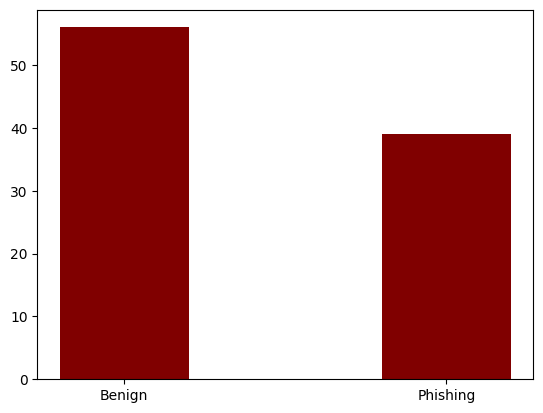

In [ ]:
random_forest.fit(X_train,y_train)
y_pred1 = random_forest.predict(X_temp)
phish=0
benign=0
for i in y_pred1:
  if i==0:
    benign=benign+1
  else:
    phish=phish+1
d={"Benign":benign,"Phishing":phish}
x_val=list(d.keys())
y_val=list(d.values())
plt.bar(x_val, y_val, color ='maroon',width = 0.4)
print(f"Benign URLs are:{benign}")
print(f"Phishing URLs are:{phish}")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred1,y_temp)

array([[46, 10],
       [ 1, 38]])

In [ ]:
print(classification_report(y_pred1, y_temp))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89        56
           1       0.79      0.97      0.87        39

    accuracy                           0.88        95
   macro avg       0.89      0.90      0.88        95
weighted avg       0.90      0.88      0.89        95



In [ ]:
from sklearn.inspection import permutation_importance
r = permutation_importance(random_forest, X_test, y_test,
                           n_repeats=30,
                           random_state=0)

for i in r.importances_mean.argsort()[::-1]:
     if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
         print(f"{extracted.columns[i]:<8}"
               f"{r.importances_mean[i]:.3f}"
                              f" +/- {r.importances_std[i]:.3f}")

URL_Depth0.202 +/- 0.030
Length of Hostname0.063 +/- 0.021
URL_Length0.054 +/- 0.015


In [ ]:
y_pred2 = naive_bayes.predict(X_temp)
phish=0
benign=0
for i in y_pred2:
  if i==0:
    benign=benign+1
  else:
    phish=phish+1
d={"Benign":benign,"Phishing":phish}
x_val=list(d.keys())
y_val=list(d.values())
plt.bar(x_val, y_val, color ='maroon',width = 0.4)
plt.show()

NameError: ignored

In [ ]:
print(classification_report(y_pred2,y_temp))

              precision    recall  f1-score   support

           0       0.10      0.56      0.16      1372
           1       0.93      0.51      0.65     14628

    accuracy                           0.51     16000
   macro avg       0.51      0.53      0.41     16000
weighted avg       0.85      0.51      0.61     16000



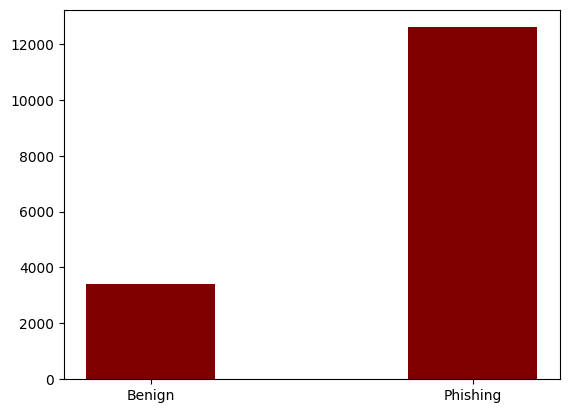

In [ ]:
y_pred3 = clf.predict(X_temp)
phish=0
benign=0
for i in y_pred3:
  if i==0:
    benign=benign+1
  else:
    phish=phish+1
d={"Benign":benign,"Phishing":phish}
x_val=list(d.keys())
y_val=list(d.values())
plt.bar(x_val, y_val, color ='maroon',width = 0.4)
plt.show()

In [ ]:
print(classification_report(y_pred3,y_temp))

              precision    recall  f1-score   support

           0       0.25      0.59      0.35      3405
           1       0.83      0.52      0.64     12595

    accuracy                           0.54     16000
   macro avg       0.54      0.56      0.50     16000
weighted avg       0.70      0.54      0.58     16000



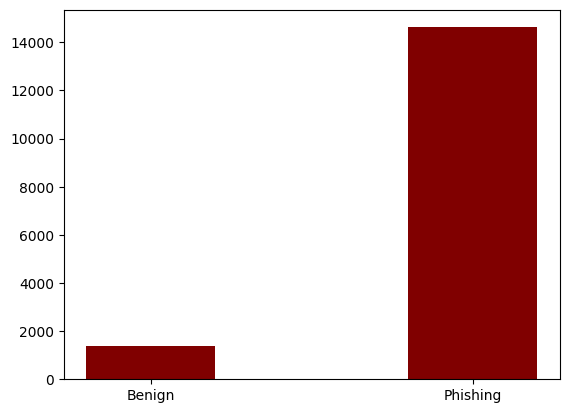

In [ ]:
y_pred3 = logistic_regression.predict(X_temp)
phish=0
benign=0
for i in y_pred3:
  if i==0:
    benign=benign+1
  else:
    phish=phish+1
d={"Benign":benign,"Phishing":phish}
x_val=list(d.keys())
y_val=list(d.values())
plt.bar(x_val, y_val, color ='maroon',width = 0.4)
plt.show()

In [ ]:
print(classification_report(y_pred3,y_temp))

              precision    recall  f1-score   support

           0       0.09      0.52      0.15      1374
           1       0.92      0.50      0.65     14626

    accuracy                           0.50     16000
   macro avg       0.50      0.51      0.40     16000
weighted avg       0.85      0.50      0.61     16000



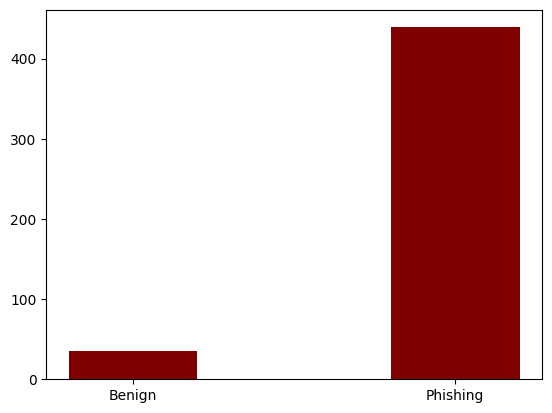

In [ ]:
y_pred4 = neural_network.predict(X_temp)
phish=0
benign=0
for i in y_pred4:
  if i==0:
    benign=benign+1
  else:
    phish=phish+1
d={"Benign":benign,"Phishing":phish}
x_val=list(d.keys())
y_val=list(d.values())
plt.bar(x_val, y_val, color ='maroon',width = 0.4)
plt.show()

In [ ]:
print(classification_report(y_pred4,y_temp))

              precision    recall  f1-score   support

           0       0.05      0.31      0.08        35
           1       0.90      0.49      0.64       439

    accuracy                           0.48       474
   macro avg       0.47      0.40      0.36       474
weighted avg       0.84      0.48      0.60       474



N GRAMS

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
X = result
X.head(20)

,URL,label
0,http://sberbank.ru/moscow/ru/person/investment...,0
1,http://otomoto.pl/oferta/trailor-tarcze-os-mer...,0
2,http://nguyentandung.org/truc-tiep-dhcd-vinamo...,0
3,http://putlocker.is/watch-the-amazing-spider-m...,0
4,http://correios.com.br/espanol/el-correo-brasi...,0
5,http://appleid.apple.co.uk.cgi-bin.webobjects....,1
6,http://appleid.apple.co.uk.cgi-bin.webobjects....,1
7,http://www.tecdiary.org/i/paypol-renew.com.log...,1
8,http://kenh14.vn/2-tek/bat-mi-chieu-thuc-luyen...,0
9,http://kenh14.vn/star/tu-tuoi-tho-co-cuc-den-c...,0


In [ ]:
col = ['label']
y = pd.DataFrame(result, columns = col)
y.head(20)

,label
0,0
1,0
2,0
3,0
4,0
5,1
6,1
7,1
8,0
9,0


In [ ]:
X.shape

(18000, 2)

In [ ]:
y.shape

(18000, 1)

In [ ]:
from nltk import ngrams
  # Specify the value of N for generating N-grams

def generateNgrams(string, n):
  output_ngrams = list(ngrams(string, n))
  # Convert the generated N-grams from tuples to strings
  output_ngrams = ["".join(ngram) for ngram in output_ngrams]
  #print(str(output_ngrams) + "\n")
  return output_ngrams

In [ ]:
for i in range(1, 8):
  print("NGRAM", i)
  corpus = [generateNgrams(text,i) for text in X.URL] # generate N grams for all URLs
  count_vect = CountVectorizer( # count vectorizer is just a mapping function here
      analyzer=lambda x:x
  )

  X_cv = count_vect.fit_transform(corpus) # X_cv is final output

  # train test split
  X_train, X_test, y_train, y_test = train_test_split(X_cv,y,random_state=104,test_size=0.25,shuffle=True)

  # Logistic regression
  classifier = LogisticRegression()
  classifier.fit(X_train, y_train)

  # Evaluate the classifier on the testing data
  accuracy = classifier.score(X_test, y_test)
  print(f"Accuracy: {accuracy:.4f}")

NGRAM 1
Accuracy: 0.9733
NGRAM 2
Accuracy: 0.9918
NGRAM 3
Accuracy: 0.9947
NGRAM 4
Accuracy: 0.9962
NGRAM 5
Accuracy: 0.9953
NGRAM 6
Accuracy: 0.9944
NGRAM 7
Accuracy: 0.9940
